# Assignment 4: Data Analytics 1
**Name: Shashank Udgirkar
**Roll no:31384
**Batch: N3

In [3]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

# Data Preprocessing

In [76]:
#Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from word2number import w2n
import scipy.stats as stats
import pylab

In [5]:
#Loading dataset in pandas dataframe
df=pd.read_csv('HousingData.csv')

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# Handling NULL Values 

In [8]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [10]:
mean_crime=df['CRIM'].mean()

In [11]:
df['CRIM']=df['CRIM'].fillna(mean_crime)

In [12]:
mean_zn=df['ZN'].mean()
df['ZN']=df['ZN'].fillna(mean_zn)

In [13]:
mean_in=df['INDUS'].mean()
df['INDUS']=df['INDUS'].fillna(mean_in)

In [14]:
mean_ch=df['CHAS'].mean()
df['CHAS']=df['CHAS'].fillna(mean_ch)

In [15]:
median_age=df['AGE'].median()
df['AGE']=df['AGE'].fillna(median_age)

In [16]:
median_lstat=df['LSTAT'].median()
df['LSTAT']=df['LSTAT'].fillna(median_lstat)

In [17]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

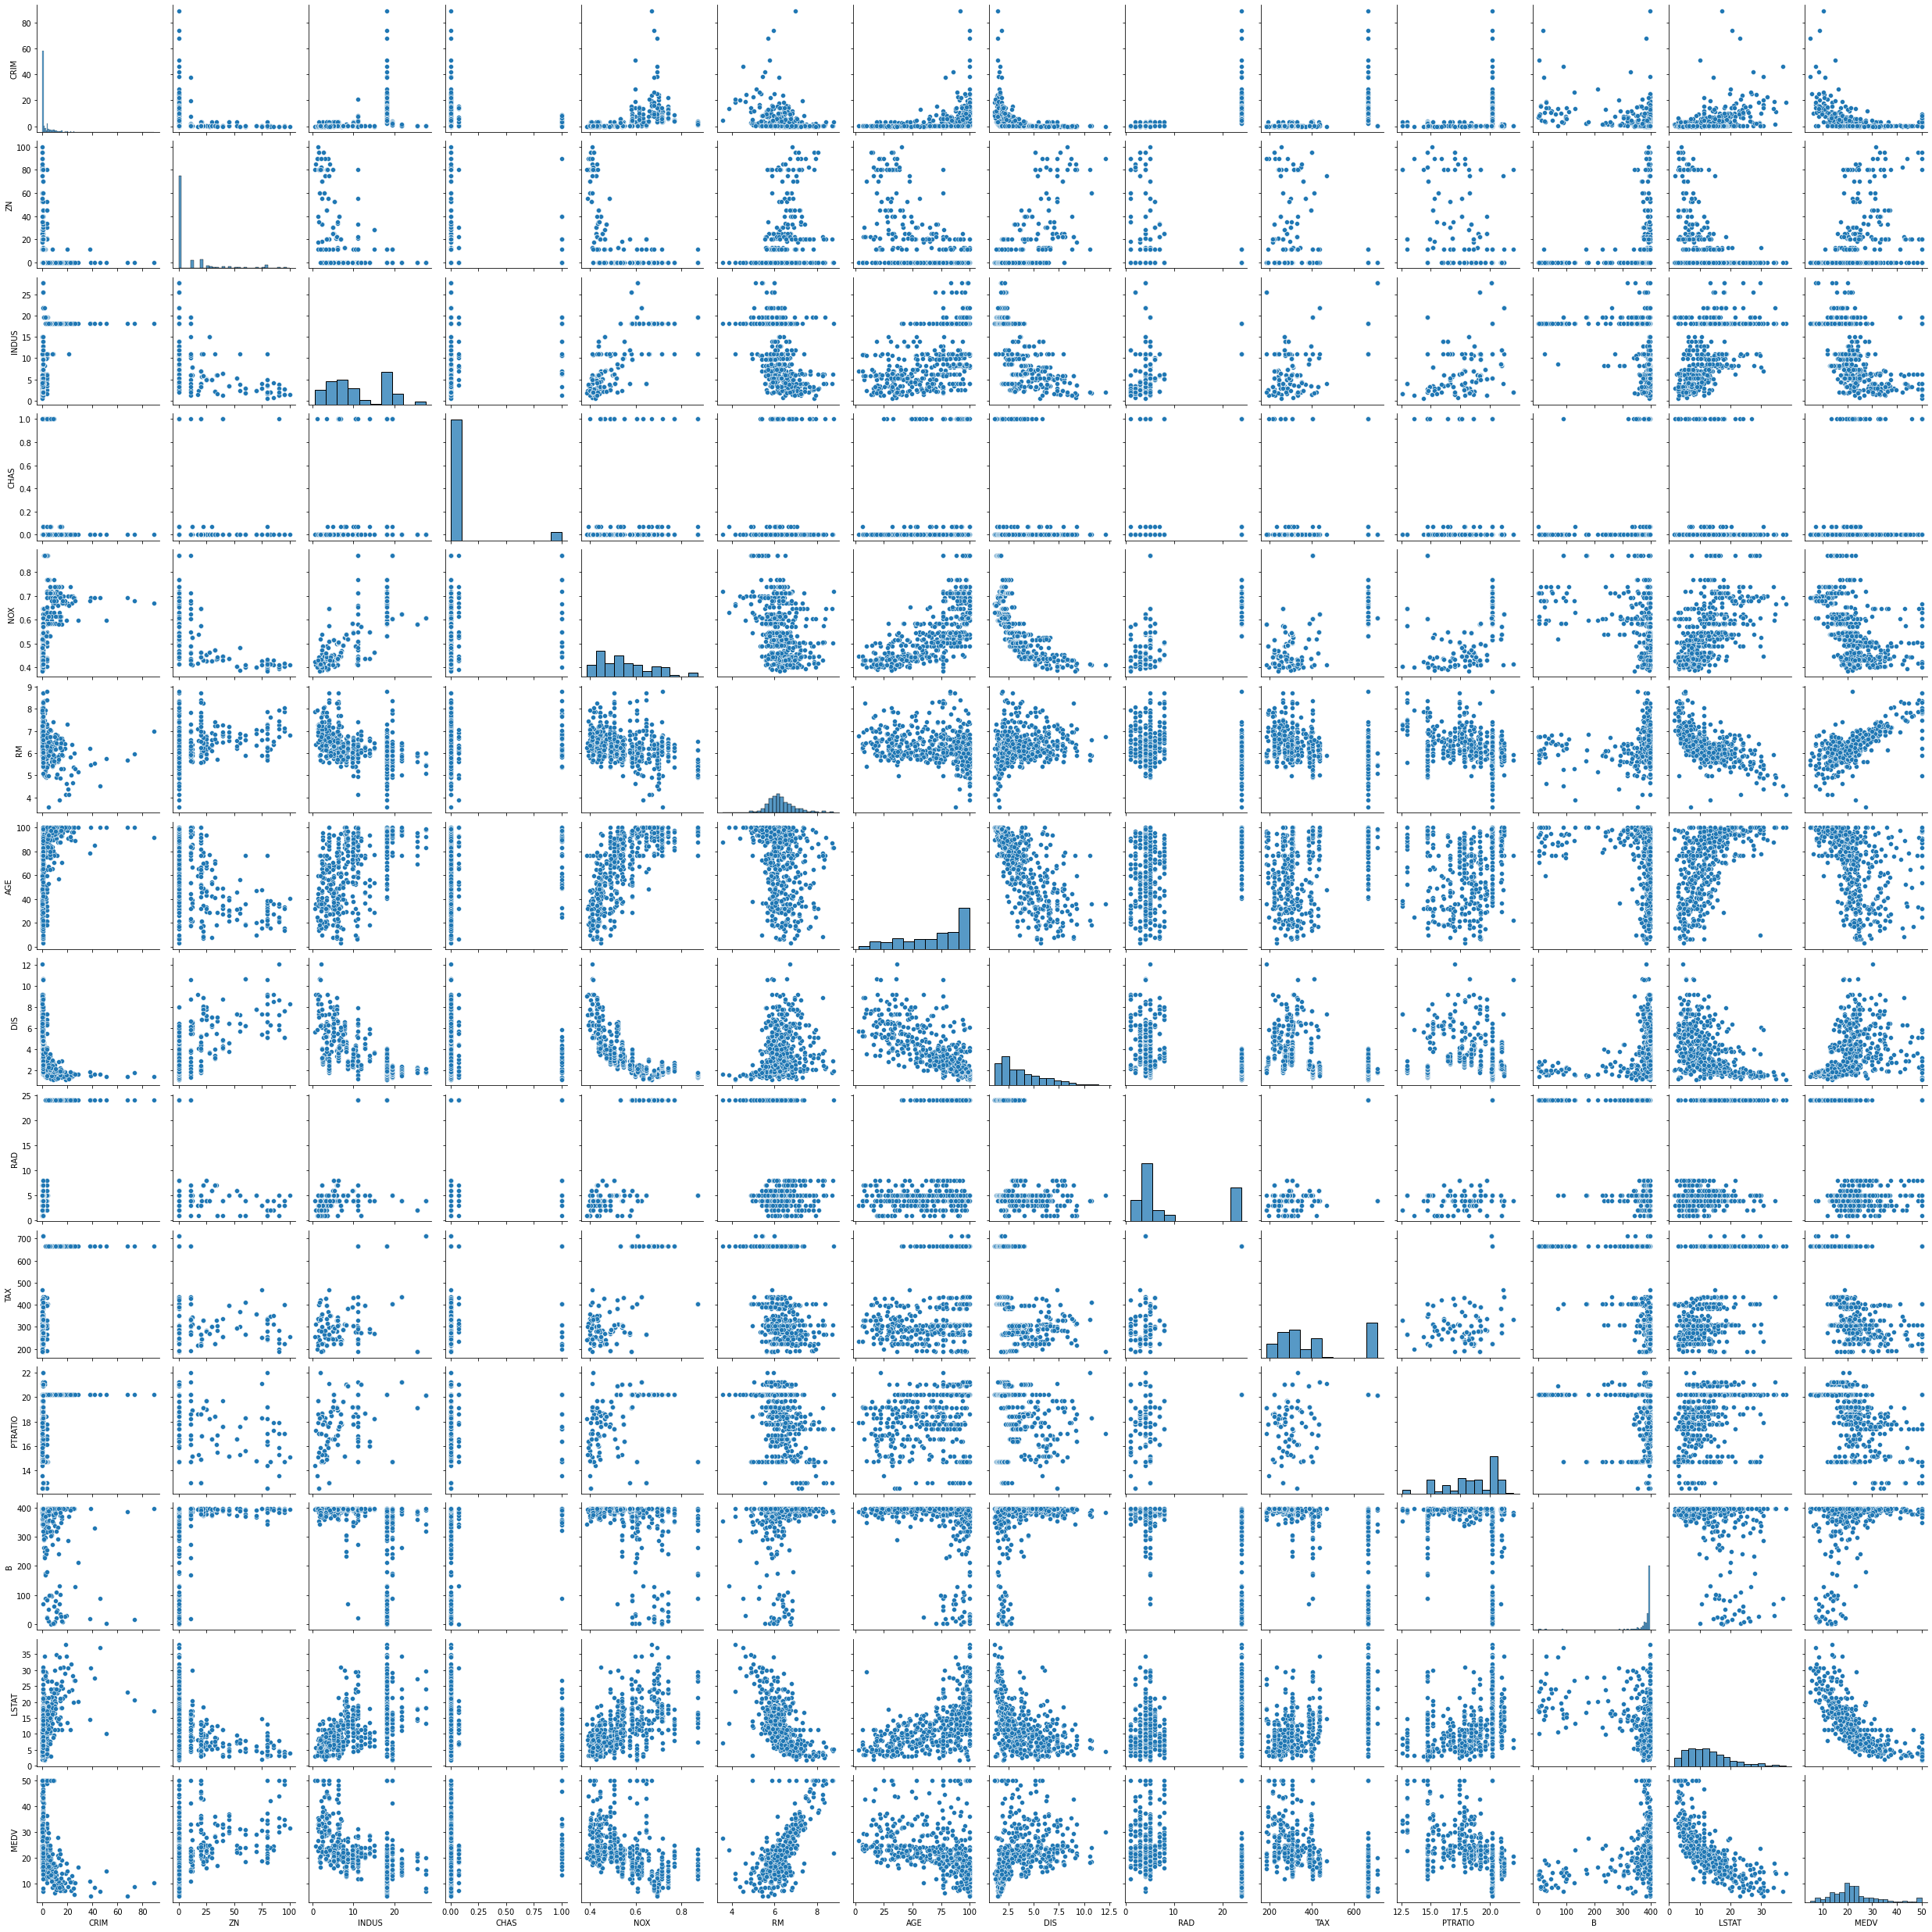

In [18]:
sns.pairplot(df)

C:\Users\SHASHANK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

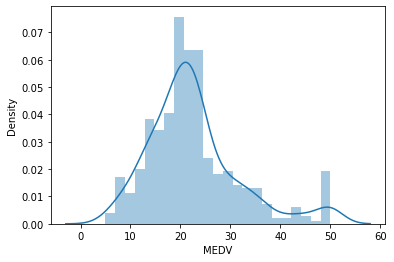

In [19]:
sns.distplot(df['MEDV'])

In [20]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.341776,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.433710,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541719,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.405500,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.616917,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567859,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.076509,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.045659,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711864,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.573040,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.239518,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.604323,0.695360
AGE,0.341776,-0.541719,0.616917,0.076509,0.711864,-0.239518,1.000000,-0.724354,0.447088,0.498408,0.261826,-0.268029,0.575022,-0.377572
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724354,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483244,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.447088,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.467765,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.498408,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524156,-0.468536


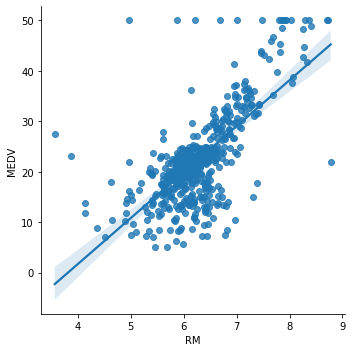

In [21]:
sns.lmplot(x='RM',y='MEDV',data=df)

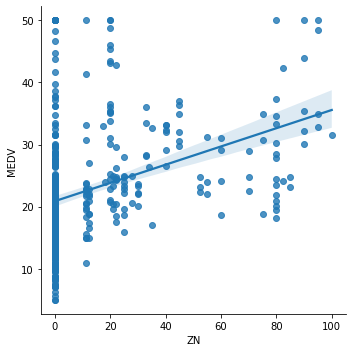

In [22]:
sns.lmplot(x='ZN',y='MEDV',data=df)

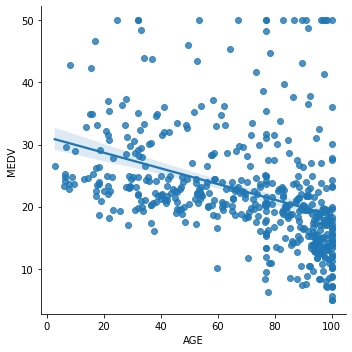

In [23]:
sns.lmplot(x='AGE',y='MEDV',data=df)

# Training Model 

In [24]:
x=df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y=df['MEDV']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [27]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
len(x_train) #80 %

404

In [30]:
len(x_test) #20 %

102

In [31]:
len(y_train)

404

In [32]:
clf=linear_model.LinearRegression()

In [33]:
clf.fit(x_train,y_train)

LinearRegression()

In [34]:
clf.predict(x_test)

array([25.61422531, 20.87843177, 18.46862438, 25.94978534, 21.63255275,
       21.65978719, 15.76285807, 18.47851487, 22.55277863, 28.55711627,
       30.18120505, 15.96091608, 23.94422017, 13.44531481, 19.40882284,
       30.35870975, 25.29505286, 21.04933249, 15.96545137, 23.34455327,
       19.00423486, 14.85929851, 17.72183175, 34.07773676, 23.82162779,
       31.51533006, 23.06883769, 22.13266755, 21.57505493, 21.1611127 ,
       11.33105032, 24.940478  , 33.91607794, 36.83765464, 34.60544458,
       16.75448851, 31.43307805, 25.61011542, 32.86404466, 21.79324183,
        5.46125918, 33.58890083, 17.17162667, 27.14019012, 19.60474439,
       25.60482373, 22.62672047, 19.41031693, 18.16946935, 29.39503526,
       28.29944097, 31.18700023, 17.50430223, 21.07410648, 23.87940974,
       29.86145875, 37.59527628,  3.07424353, 15.82749996, 32.86995902,
       25.29200842, 19.75919852, 27.68798879,  2.76397189, 21.06355417,
       20.31575259, 24.00698591, 19.22679209,  9.31552155, 35.00

In [35]:
y_test

213    28.1
335    21.1
442    18.4
293    23.9
432    16.1
       ... 
352    18.6
71     21.7
486    19.1
37     21.0
26     16.6
Name: MEDV, Length: 102, dtype: float64

In [36]:
clf.score(x_test,y_test)

0.6468713205277775

In [37]:
y_pred=clf.predict(x_test)

In [38]:
#Mean Squared error
print(np.mean((y_pred-y_test)**2))

18.605144514827117


Text(0, 0.5, 'Predicted Values')

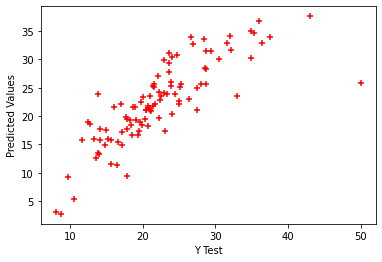

In [39]:
plt.scatter(y_test,y_pred,marker='+',color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Values')

In [40]:
# 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE
# corr above 0.5
xt=df[['INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','LSTAT']]
yt=df['MEDV']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
clf2=linear_model.LinearRegression()

In [43]:
clf2.fit(x_train,y_train)

LinearRegression()

In [44]:
clf2.predict(x_test)

array([21.2568861 , 20.23580479, 19.49063805, 28.81994825, 19.32707385,
       30.79564011, 25.15782824, 30.40042564, 41.5072177 , 23.43199355,
       26.16005744, 15.54190808,  8.34694211, 39.38165562, 15.34919647,
       22.24394354, 13.54570938, 21.14514127, 16.27757067, 24.32141882,
       16.22729587, 20.61089565, 16.97533527, 17.30226902, 15.89048562,
       19.16598919, 19.22539861, 18.01999942, 26.94765654, 18.88766405,
       21.76911465, 36.40262814, 31.98255524, 26.36274993, 17.20256927,
       19.16260586, 30.88177591, 25.87411974, 35.47868916, 21.4049777 ,
       37.26578231,  9.37318205, 27.72777786, 20.40526354, 22.29649613,
       36.29270582, 17.68836246, 35.04126705, 33.55009737, 34.18632699,
       19.34828059, 28.87408896, 30.21877203, 19.25093879, 24.32035633,
        3.96616265,  6.89576855, 29.59224059, 15.89512482, 30.35847743,
       25.30850089, 25.16109256, 18.67465569, 19.64267881, 20.5048029 ,
       19.41632422, 21.88753736, 19.02874271, 15.62290467, 24.61

In [45]:
y_test

441    17.1
103    19.3
420    16.7
93     25.0
323    18.5
       ... 
107    20.4
486    19.1
439    12.8
39     30.8
495    23.1
Name: MEDV, Length: 102, dtype: float64

In [46]:
clf2.score(x_test,y_test)

0.7945045659842225

# Training by removing outliers 

In [47]:
Q1=df['MEDV'].quantile(0.25)
Q3=df['MEDV'].quantile(0.75)
Q1,Q3

(17.025, 25.0)

In [48]:
IQR=Q3-Q1

In [49]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(5.0624999999999964, 36.962500000000006)

In [50]:
df[(df['MEDV']<lower_limit)|(df['MEDV']>upper_limit)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.120830,0.000000,2.89,0.0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
98,0.081870,0.000000,2.89,0.0,0.4450,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
157,1.223580,11.211934,19.58,0.0,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
161,1.463360,0.000000,19.58,0.0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.833770,0.000000,19.58,1.0,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.519020,0.000000,19.58,1.0,0.6050,8.375,76.8,2.1620,5,403,14.7,388.45,3.32,50.0
166,2.010190,0.000000,19.58,0.0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
179,0.057800,0.000000,2.46,0.0,0.4880,6.980,58.4,2.8290,3,193,17.8,396.90,5.04,37.2
180,0.065880,0.000000,2.46,0.0,0.4880,7.765,83.3,2.7410,3,193,17.8,395.56,7.56,39.8
182,0.091030,0.000000,2.46,0.0,0.4880,7.155,92.2,2.7006,3,193,17.8,394.12,4.82,37.9


In [51]:
df_without_outliers=df[(df['MEDV']>lower_limit)&(df['MEDV']<upper_limit)]
df_without_outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [52]:
df_without_outliers.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [53]:
mean_crime=df_without_outliers['CRIM'].mean()
df_without_outliers['CRIM']=df_without_outliers['CRIM'].fillna(mean_crime)

C:\Users\SHASHANK\AppData\Local\Temp/ipykernel_1720/1111248431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers['CRIM']=df_without_outliers['CRIM'].fillna(mean_crime)


In [54]:
mean_zn=df_without_outliers['ZN'].mean()
df_without_outliers['ZN']=df_without_outliers['ZN'].fillna(mean_zn)

C:\Users\SHASHANK\AppData\Local\Temp/ipykernel_1720/87093364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers['ZN']=df_without_outliers['ZN'].fillna(mean_zn)


In [55]:
mean_in=df_without_outliers['INDUS'].mean()
df_without_outliers['INDUS']=df_without_outliers['INDUS'].fillna(mean_in)

C:\Users\SHASHANK\AppData\Local\Temp/ipykernel_1720/2388118821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers['INDUS']=df_without_outliers['INDUS'].fillna(mean_in)


In [56]:
mean_ch=df_without_outliers['CHAS'].mean()
df_without_outliers['CHAS']=df_without_outliers['CHAS'].fillna(mean_ch)

C:\Users\SHASHANK\AppData\Local\Temp/ipykernel_1720/4041804506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers['CHAS']=df_without_outliers['CHAS'].fillna(mean_ch)


In [57]:
median_age=df_without_outliers['AGE'].median()
df_without_outliers['AGE']=df_without_outliers['AGE'].fillna(median_age)

C:\Users\SHASHANK\AppData\Local\Temp/ipykernel_1720/144163083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers['AGE']=df_without_outliers['AGE'].fillna(median_age)


In [58]:
median_lstat=df_without_outliers['LSTAT'].median()
df_without_outliers['LSTAT']=df_without_outliers['LSTAT'].fillna(median_lstat)

C:\Users\SHASHANK\AppData\Local\Temp/ipykernel_1720/2770526051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers['LSTAT']=df_without_outliers['LSTAT'].fillna(median_lstat)


In [59]:
df_without_outliers.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [60]:
x1=df_without_outliers[['INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']]
y1=df_without_outliers['MEDV']

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=17)

In [68]:
clf1=linear_model.LinearRegression()

In [69]:
clf1.fit(x_train,y_train)

LinearRegression()

In [70]:
clf1.predict(x_test)

array([18.75245006, 23.66912029, 29.50515658, 19.54994639, 20.47565601,
       22.75496387, 23.89895882, 13.84428362, 16.99884246, 21.21635262,
        7.63703957, 26.91891061, 14.94052552, 17.97458244, 17.51384029,
       17.51733407, 25.64184172, 25.82700946, 20.35485407, 29.65293529,
       10.52934852, 19.30842072, 18.38427008, 15.22161946, 20.68353275,
       16.05684937, 23.87414574, 23.13735586, 22.1579059 , 25.74189268,
       15.36714728, 23.49062421, 23.53763413, 16.38081293, 15.64497632,
       21.76218686, 15.2809204 , 26.58047775, 16.1729301 , 16.29757382,
       29.15846596, 25.57751227, 26.97822131, 25.70764281, 22.34919258,
       14.75471165, 23.36828856, 27.89902077, 20.21480725, 14.88603257,
       28.15374769, 28.80134366, 23.16835483, 16.25298868, 20.64826499,
       17.23518637, 26.02428095, 15.88364365, 18.73811291, 19.91292667,
       25.91510196, 26.85928887, 11.29704029, 21.18302166, 18.14380792,
       27.8904731 , 20.42486131, 14.68422935, 24.09434299, 20.32

In [71]:
y_test

499    17.5
111    22.8
263    31.0
107    20.4
375    15.0
       ... 
124    18.8
279    35.1
453    17.8
260    33.8
488    15.2
Name: MEDV, Length: 94, dtype: float64

# Accuracy

In [72]:
clf1.score(x_test,y_test) #Highest Accuracy

0.7812031886491653

# Checking Skewness

In [73]:
df_without_outliers['MEDV'].skew()

0.20256283436312952

In [74]:
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

C:\Users\SHASHANK\AppData\Local\Temp/ipykernel_1720/1434200815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers['MEDV reciprocal']=1/df_without_outliers['MEDV']


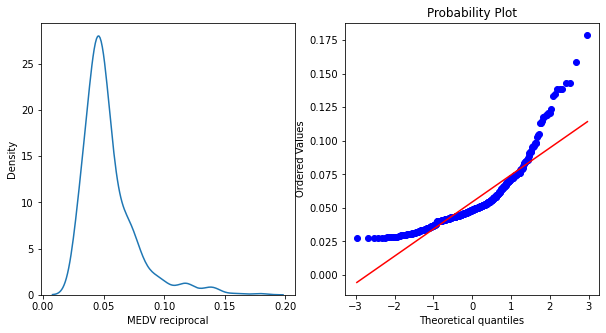

In [77]:
df_without_outliers['MEDV reciprocal']=1/df_without_outliers['MEDV']
normality(df_without_outliers,'MEDV reciprocal')

In [78]:
x2=df_without_outliers[['INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']]
y2=df_without_outliers['MEDV reciprocal']

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=17)

In [81]:
clf4=linear_model.LinearRegression()

In [82]:
clf4.fit(x_train,y_train)

LinearRegression()

In [83]:
clf4.predict(x_test)

array([0.058192  , 0.04786966, 0.03751014, 0.05737387, 0.06385598,
       0.04566808, 0.03945095, 0.06752624, 0.05859093, 0.04524619,
       0.09652997, 0.03572888, 0.0748433 , 0.05797272, 0.0558664 ,
       0.05945968, 0.0371815 , 0.03825574, 0.05319106, 0.02926078,
       0.08755665, 0.05693463, 0.07117065, 0.07440909, 0.05437019,
       0.07498679, 0.04244343, 0.04396094, 0.04845319, 0.04068876,
       0.07747219, 0.04451434, 0.04828122, 0.0685359 , 0.06878633,
       0.04475615, 0.0767591 , 0.03355889, 0.0672685 , 0.06262993,
       0.03445211, 0.03730495, 0.033125  , 0.03845324, 0.05110237,
       0.06653203, 0.0410419 , 0.03137351, 0.05950898, 0.0817668 ,
       0.02842424, 0.02945571, 0.0462836 , 0.07273766, 0.04646578,
       0.06164942, 0.03629008, 0.07583759, 0.06059544, 0.05794628,
       0.03320881, 0.03946369, 0.08341507, 0.05157029, 0.06211081,
       0.03302773, 0.05480179, 0.06945382, 0.03763878, 0.05286707,
       0.03515162, 0.06183979, 0.04989152, 0.03430376, 0.06885

In [84]:
y_test

499    0.057143
111    0.043860
263    0.032258
107    0.049020
375    0.066667
         ...   
124    0.053191
279    0.028490
453    0.056180
260    0.029586
488    0.065789
Name: MEDV reciprocal, Length: 94, dtype: float64

In [85]:
clf4.score(x_test,y_test)

0.6628343863113517